In [363]:
import pandas as pd
import matplotlib.pyplot as plt

import _functions_sql as fs

In [364]:
# import from database
#df_eda = fs.get_dataframe('SELECT * FROM production_and_emissions')

In [365]:
import _functions_data_files as fdf
source_dir = 'fao_emissions_intensities'
source_file = 'Environment_Emissions_intensities_E_All_Data_(Normalized).csv'

In [366]:
# import raw data into a pandas dataframe
emissions_df = pd.read_csv(
      fdf.get_path(source_file, source_dir)
    , encoding='latin-1'
    , converters={'Note': str} # handle DtypeWarning without 'low_memory=False' 
)

In [367]:
# Define group of items
world_emissions_intensity = emissions_df[(emissions_df.Element == 'Emissions intensity') & 
                                         (emissions_df.Area == 'World')]
items = world_emissions_intensity.Item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk = list(filter(lambda x: 'Raw milk' in x, items))
remaining = list(set(items) - set(meat + milk))

In [368]:
def food_type(food_item):
    """
    Attribute food item to a type
    """
    if food_item in meat:
        return 'meat'
    elif food_item in milk:
        return 'milk'
    return 'rice or cereals'

In [369]:
# Cluster food with respect to either {'meat', 'milk', 'rice or cereals'}
emissions_df['food_type'] = emissions_df.Item.apply(lambda x: food_type(x))

In [370]:
def plot_emissions_food_type(year):
    """
    plots the emissions proportions by food type for a given year
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    world_net_production = emissions_df[(emissions_df.Element == 'Production') & (emissions_df.Area == 'World') 
                                             & (emissions_df.Year == year)]
    
    world_net_production[['food_type', 'Value']].groupby('food_type').agg('sum').plot.pie(y='Value', 
                                                    ax=axes[0], fontsize=13, autopct='%1.1f%%')
    axes[0].set_ylabel('')
    axes[0].legend('')
    axes[0].set_title('Total Food Production by Type ({})'.format(year), fontsize=16)
 
 
    world_net_emission_2016 = emissions_df[(emissions_df.Element == 'Emissions (CO2eq) (AR5)') & (emissions_df.Area == 'World') 
                                             & (emissions_df.Year == year)]
    world_net_emission_2016[['food_type', 'Value']].groupby('food_type').agg('sum').plot.pie(y='Value', 
                                                    ax=axes[1], fontsize=13, autopct='%1.1f%%')
    axes[1].set_ylabel('')
    axes[1].legend('')
    axes[1].set_title('Contribution to Total CO2 Emissions by Type ({})'.format(year), fontsize=16)
    plt.show()

    

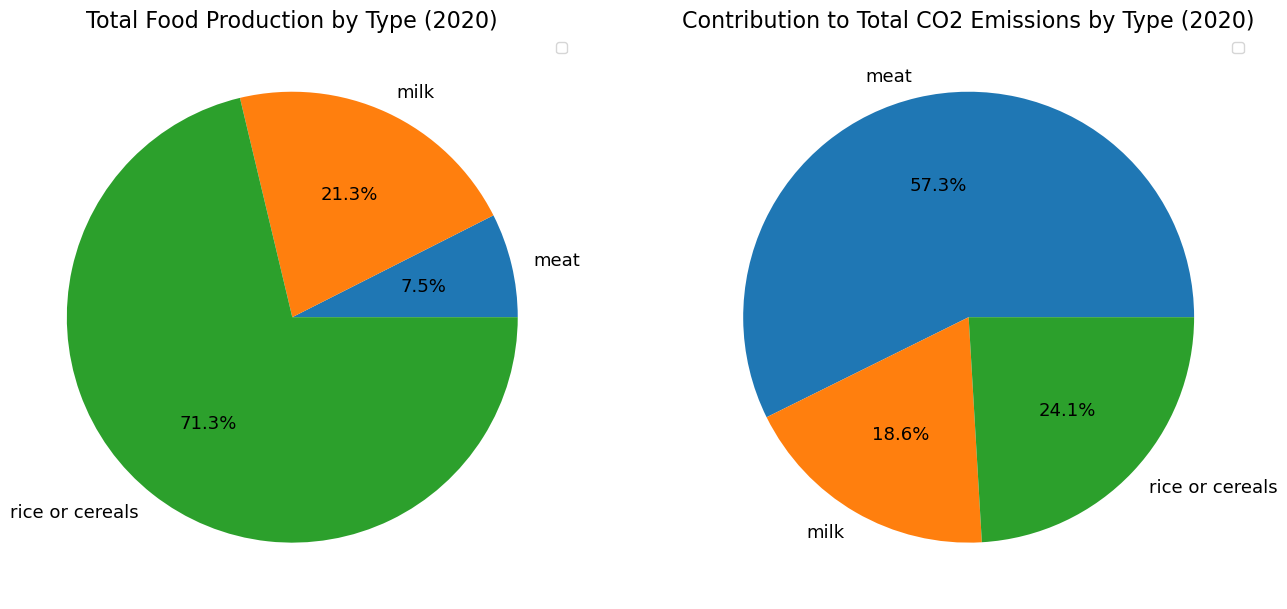

In [371]:
# Plotting the emissions by food type for the year 1961
plot_emissions_food_type(2020)

In [372]:
plotdata = pd.DataFrame({
    "2018_m":[40, 12, 10, 26, 36],
    "2019_m":[19, 8, 30, 21, 38],
    "2020_m":[10, 10, 42, 17, 37]
    }, index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
plotdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Dad to Me
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2018_m  5 non-null      int64
 1   2019_m  5 non-null      int64
 2   2020_m  5 non-null      int64
dtypes: int64(3)
memory usage: 160.0+ bytes


In [373]:
emissions_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,food_type
0,2,'004,Afghanistan,1718,'F1718,Cereals excluding rice,71761,Emissions intensity,1961,1961,kg CO2eq/kg,0.1130,E,rice or cereals
1,2,'004,Afghanistan,1718,'F1718,Cereals excluding rice,71761,Emissions intensity,1962,1962,kg CO2eq/kg,0.1149,E,rice or cereals
2,2,'004,Afghanistan,1718,'F1718,Cereals excluding rice,71761,Emissions intensity,1963,1963,kg CO2eq/kg,0.1205,E,rice or cereals
3,2,'004,Afghanistan,1718,'F1718,Cereals excluding rice,71761,Emissions intensity,1964,1964,kg CO2eq/kg,0.1154,E,rice or cereals
4,2,'004,Afghanistan,1718,'F1718,Cereals excluding rice,71761,Emissions intensity,1965,1965,kg CO2eq/kg,0.1144,E,rice or cereals


In [374]:
test = emissions_df[(emissions_df['Area'] == 'World') & (emissions_df['Element'] == 'Production')][['Year', 'food_type', 'Value']].copy()

test = test.groupby(['food_type','Year']).sum()

test = test.reset_index()

#test_pivat = emissions_df.pivot(index='food_type', columns='Year', values='Value')
test.head(10)

,food_type,Year,Value
0,meat,1961,7.156868e+07
1,meat,1962,7.531497e+07
2,meat,1963,8.006175e+07
3,meat,1964,7.610881e+07
4,meat,1965,8.876075e+07
5,meat,1966,8.912464e+07
6,meat,1967,9.347916e+07
7,meat,1968,9.646818e+07
8,meat,1969,9.803649e+07
9,meat,1970,1.066682e+08


In [375]:
test_emi = emissions_df[(emissions_df['Area'] == 'World') & (emissions_df['Element'] == 'Emissions (CO2eq) (AR5)')][['Year', 'food_type', 'Value']].copy()

test_emi = test_emi.groupby(['food_type','Year']).sum()

test_emi = test_emi.reset_index()

#test_pivat = emissions_df.pivot(index='food_type', columns='Year', values='Value')
test_emi.head(10)

,food_type,Year,Value
0,meat,1961,1.792529e+06
1,meat,1962,1.836360e+06
2,meat,1963,1.865421e+06
3,meat,1964,1.902663e+06
4,meat,1965,1.950307e+06
5,meat,1966,1.990584e+06
6,meat,1967,2.048301e+06
7,meat,1968,2.082425e+06
8,meat,1969,2.094673e+06
9,meat,1970,2.118434e+06


In [376]:
# Pivot your DataFrame to have years as columns
test_df = test.pivot(index='Year', columns='food_type', values='Value')

test_df

food_type,meat,milk,rice or cereals
Year,,,
1961,7.156868e+07,4.067876e+08,1.008401e+09
1962,7.531497e+07,4.108209e+08,1.070298e+09
1963,8.006175e+07,4.055794e+08,1.054056e+09
1964,7.610881e+07,4.127902e+08,1.147418e+09
1965,8.876075e+07,4.374147e+08,1.118170e+09
...,...,...,...
2017,3.184255e+08,8.449439e+08,3.015450e+09
2018,3.237477e+08,8.674173e+08,2.963722e+09
2019,3.180321e+08,8.860820e+08,3.018964e+09


In [377]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1961 to 2021
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meat             61 non-null     float64
 1   milk             61 non-null     float64
 2   rice or cereals  61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [378]:
# Pivot your DataFrame to have years as columns
test_emi_df = test_emi.pivot(index='Year', columns='food_type', values='Value')

test_emi_df

food_type,meat,milk,rice or cereals
Year,,,
1961,1.792529e+06,709368.6847,6.259566e+05
1962,1.836360e+06,708035.0529,6.517392e+05
1963,1.865421e+06,708766.4136,6.581075e+05
1964,1.902663e+06,704304.9212,6.884008e+05
1965,1.950307e+06,706532.1738,6.951417e+05
...,...,...,...
2017,2.941147e+06,955652.2782,1.256020e+06
2018,2.945075e+06,961854.5083,1.250384e+06
2019,2.959436e+06,970436.4163,1.229480e+06


In [379]:
test_emi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1961 to 2021
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meat             61 non-null     float64
 1   milk             61 non-null     float64
 2   rice or cereals  61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [380]:
test_df = test_df[test_df.index % 10 == 0]

In [381]:
test_emi_df = test_emi_df[test_emi_df.index % 10 == 0]

In [382]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1970 to 2020
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meat             6 non-null      float64
 1   milk             6 non-null      float64
 2   rice or cereals  6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [383]:
test_emi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1970 to 2020
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meat             6 non-null      float64
 1   milk             6 non-null      float64
 2   rice or cereals  6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [384]:
test_emi_df.shape[0]

6

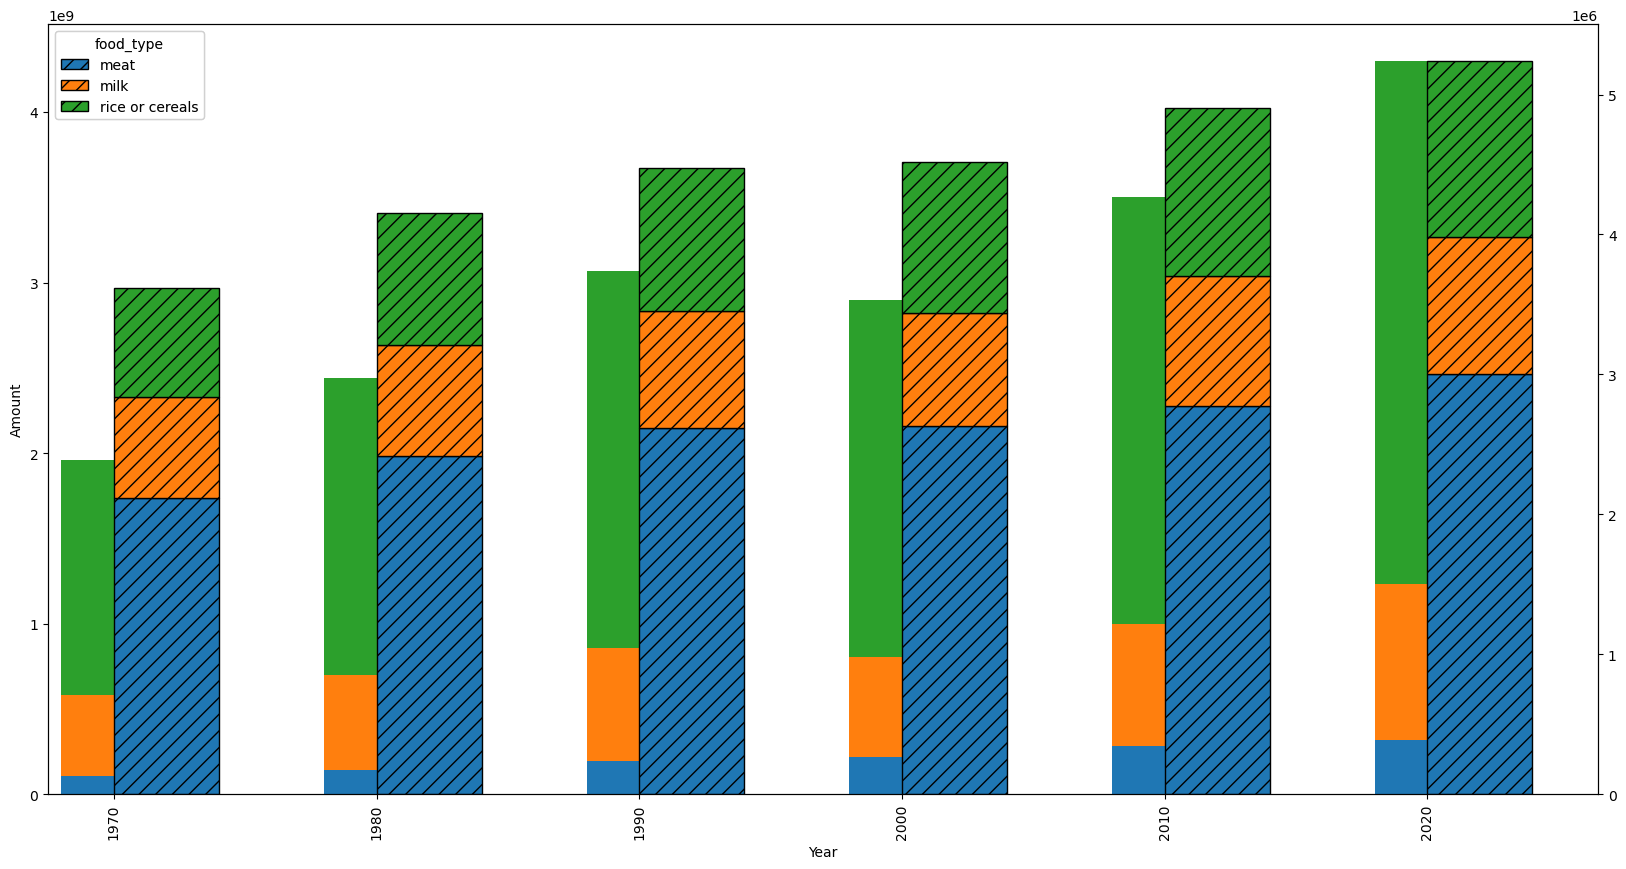

In [391]:
import numpy as np

ind = np.arange(test_emi_df.shape[0])  # the x locations for the groups
width = 0.4  # the width of the bars

# use matplotlib default colors
my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#ax2.set_ylim([0, 7000000])

#rects1 = ax.bar(ind - width/4, test_emi_df[['meat', 'milk']], kind='bar', stacked=True, width=width, color='r', alpha=1, align='center')
#rects2 = ax2.bar(ind + width/4, test_df['meat'], stacked=True, width=width, color='b', alpha=1, align='center')


test_df.plot(kind='bar', stacked=True, ax=ax, width=width, position=0.5, color=my_colors)
test_emi_df.plot(kind='bar', stacked=True, ax=ax2, width=width, position=0, hatch='//', edgecolor='black')

ax.set_ylabel('Amount')
#ax2.set_ylabel('Price')


plt.show()

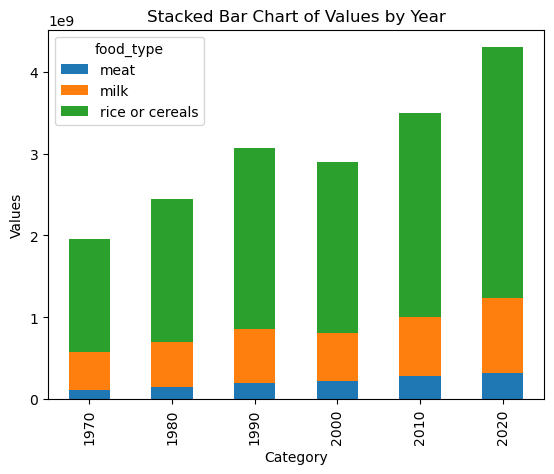

In [386]:
# Plot a stacked bar chart
test_df.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Values by Year')
plt.xlabel('Category')
plt.ylabel('Values')


# geht hier nich: plt.figure(figsize=(10,6))

plt.show()

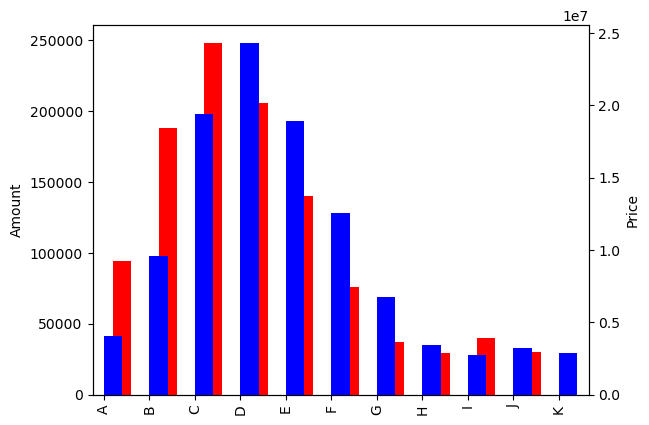

In [387]:
import pandas as pd
from io import StringIO

s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=2)
df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

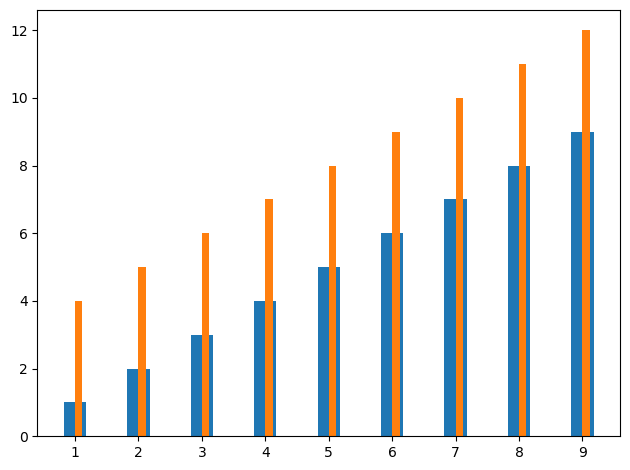

In [388]:
import numpy as np

a = range(1,10)
b = range(4,13)
ind = np.arange(len(a))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=ind, height=a, width=0.35, align='center')
ax.bar(x=ind, height=b, width=0.35/3, align='edge')

plt.xticks(ind, a)

plt.tight_layout()
plt.show()

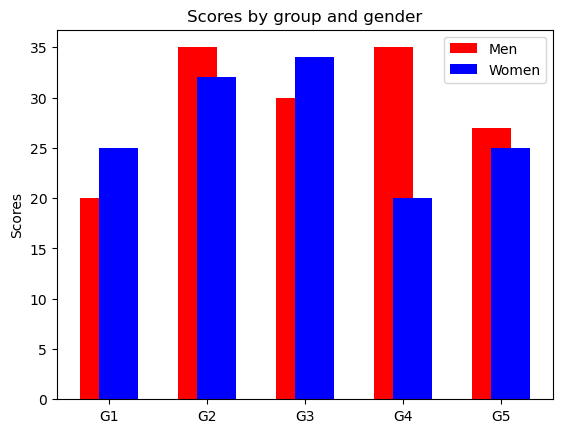

In [389]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N)  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/4, men_means, width, color='r', alpha=1, align='center')
rects2 = ax.bar(ind + width/4, women_means, width, color='b', alpha=1, align='center')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

plt.show()